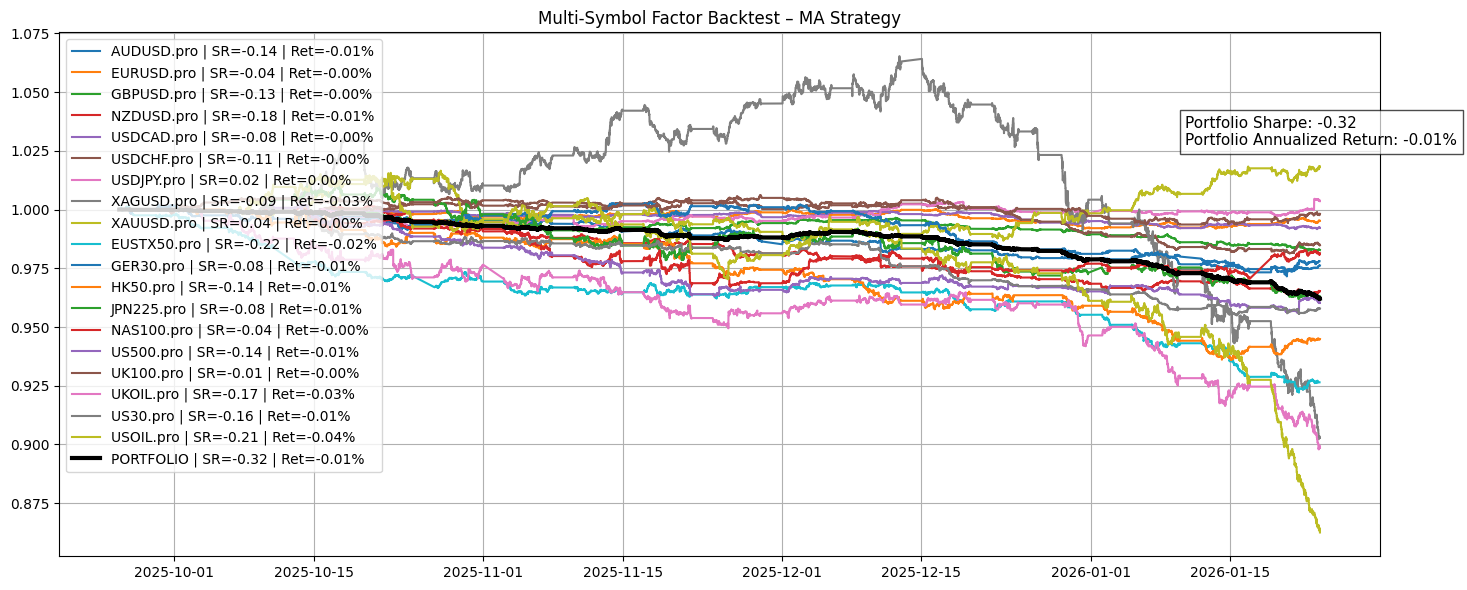

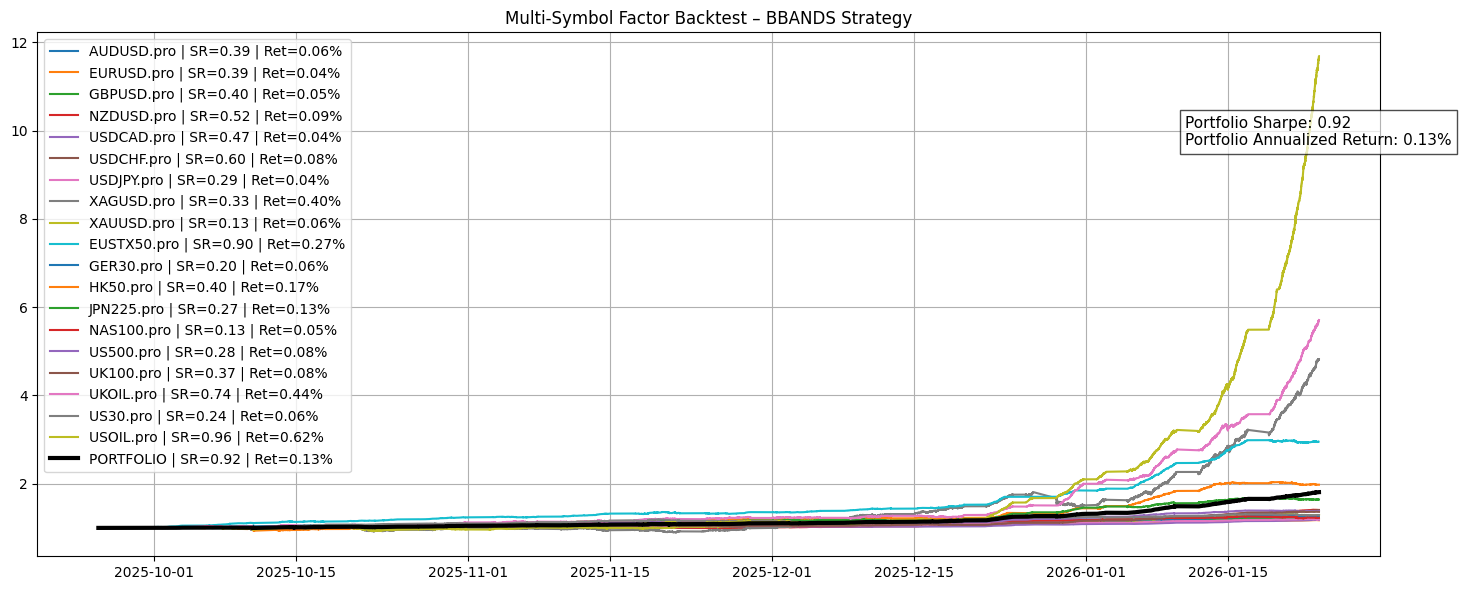

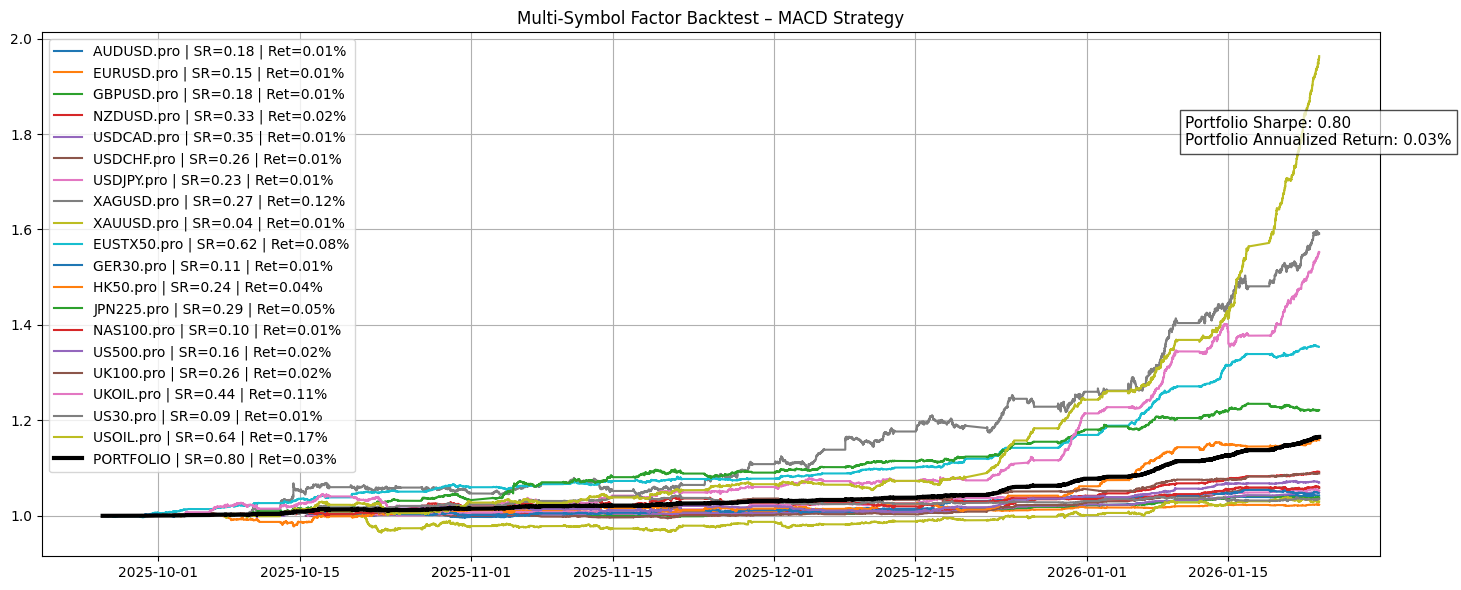

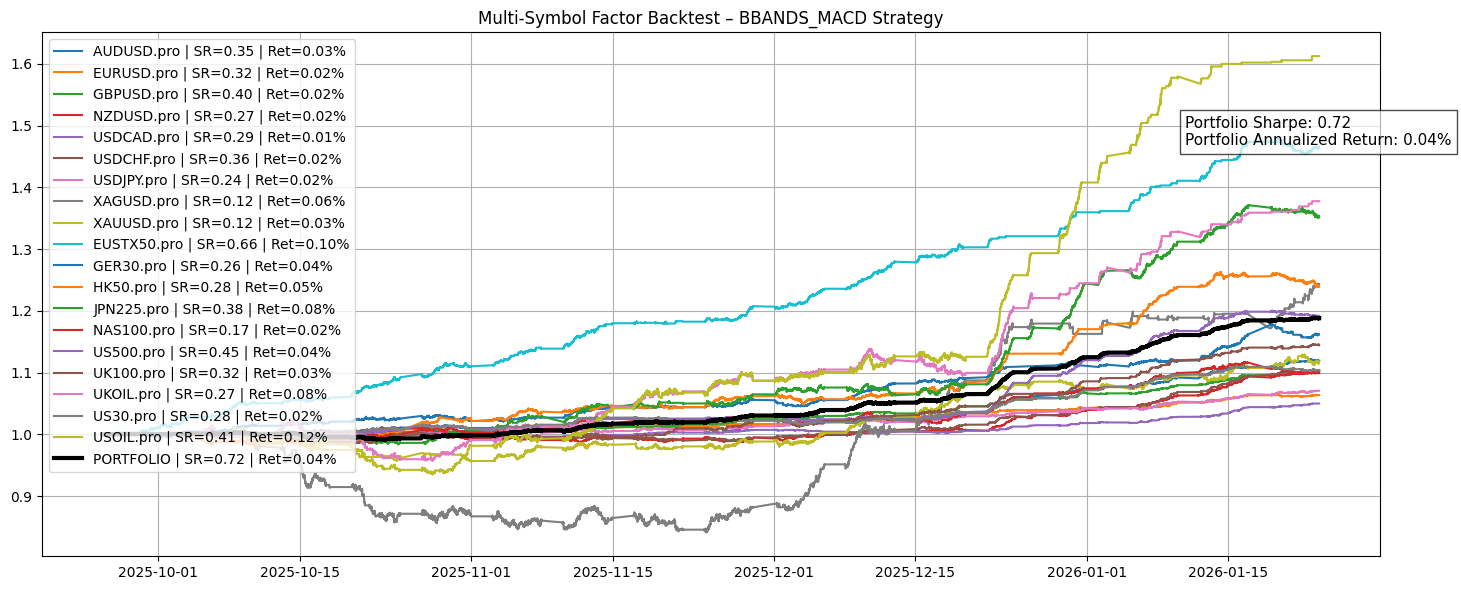

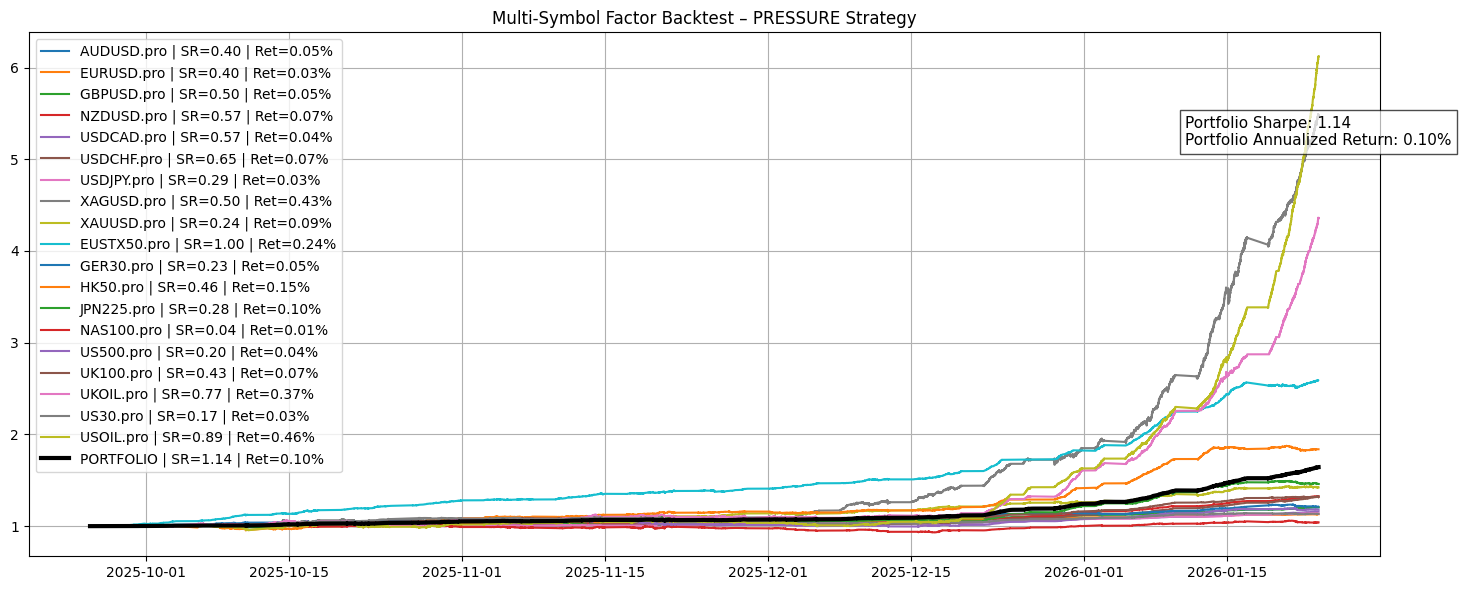

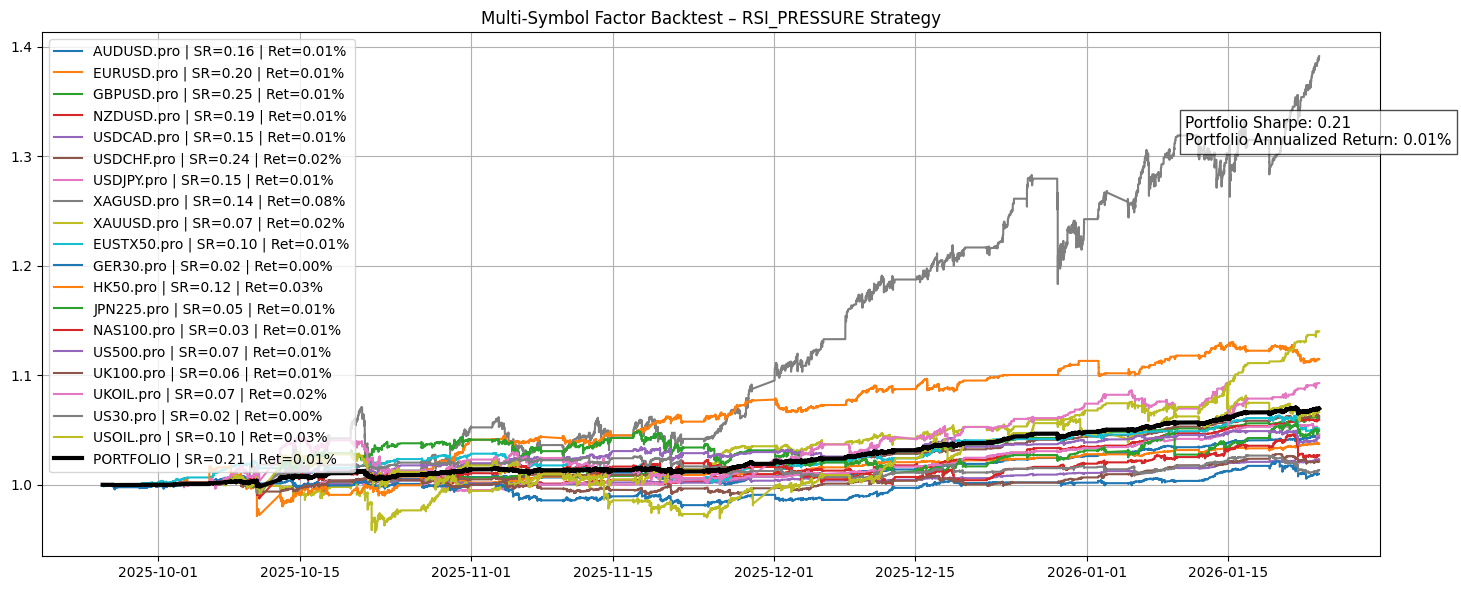

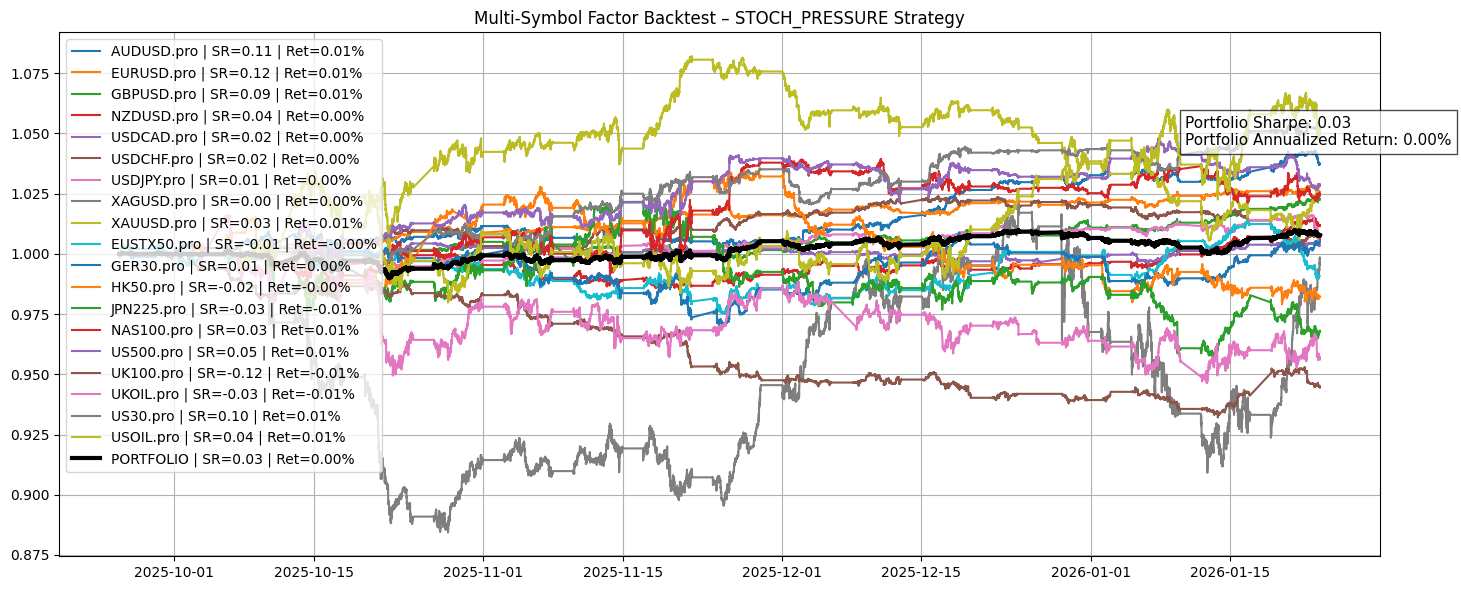

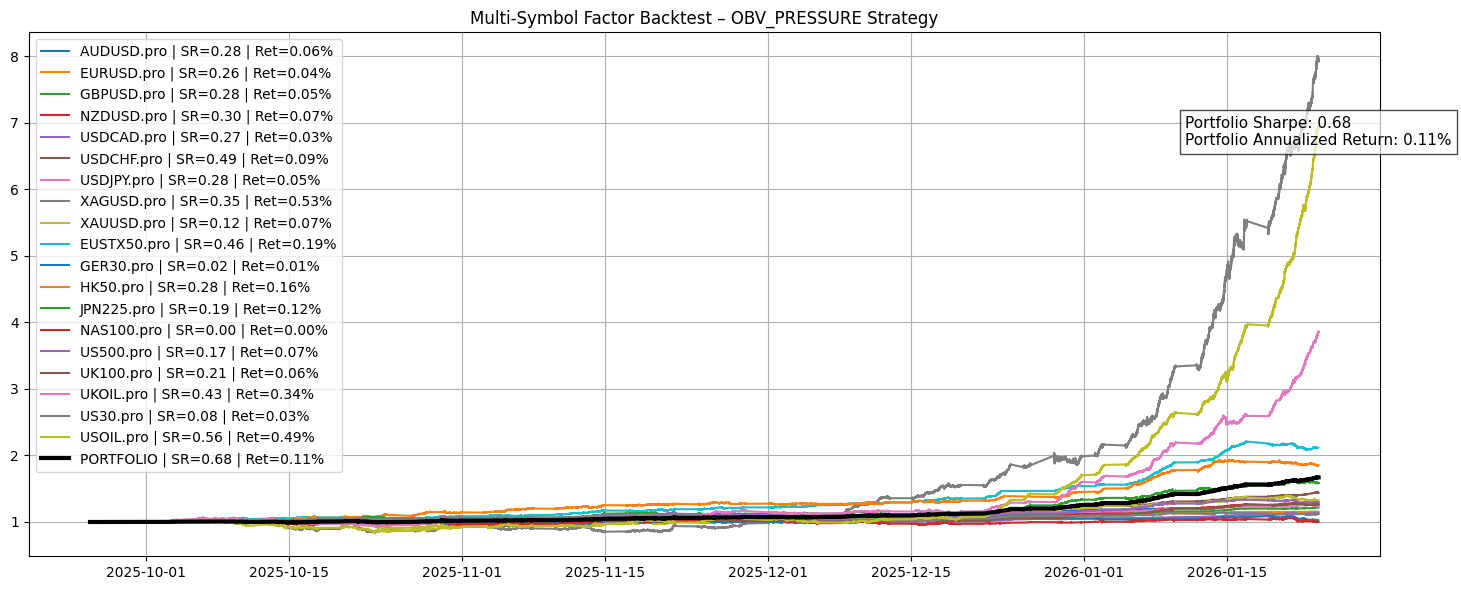

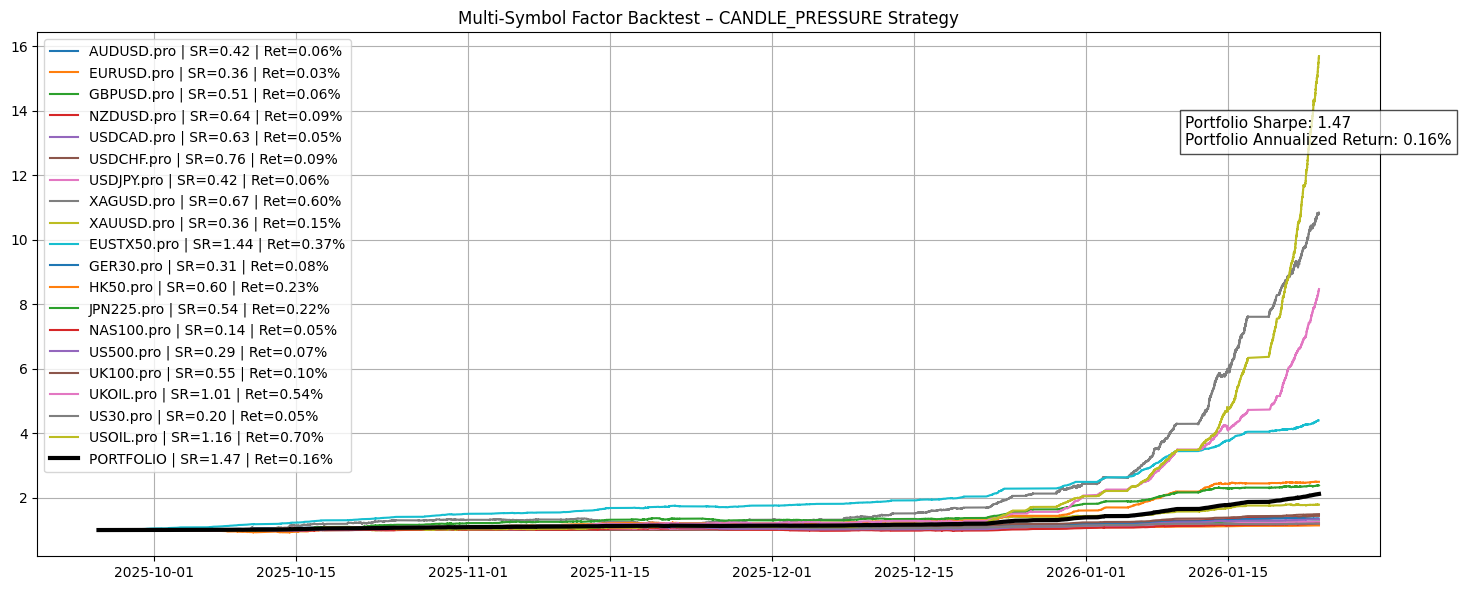

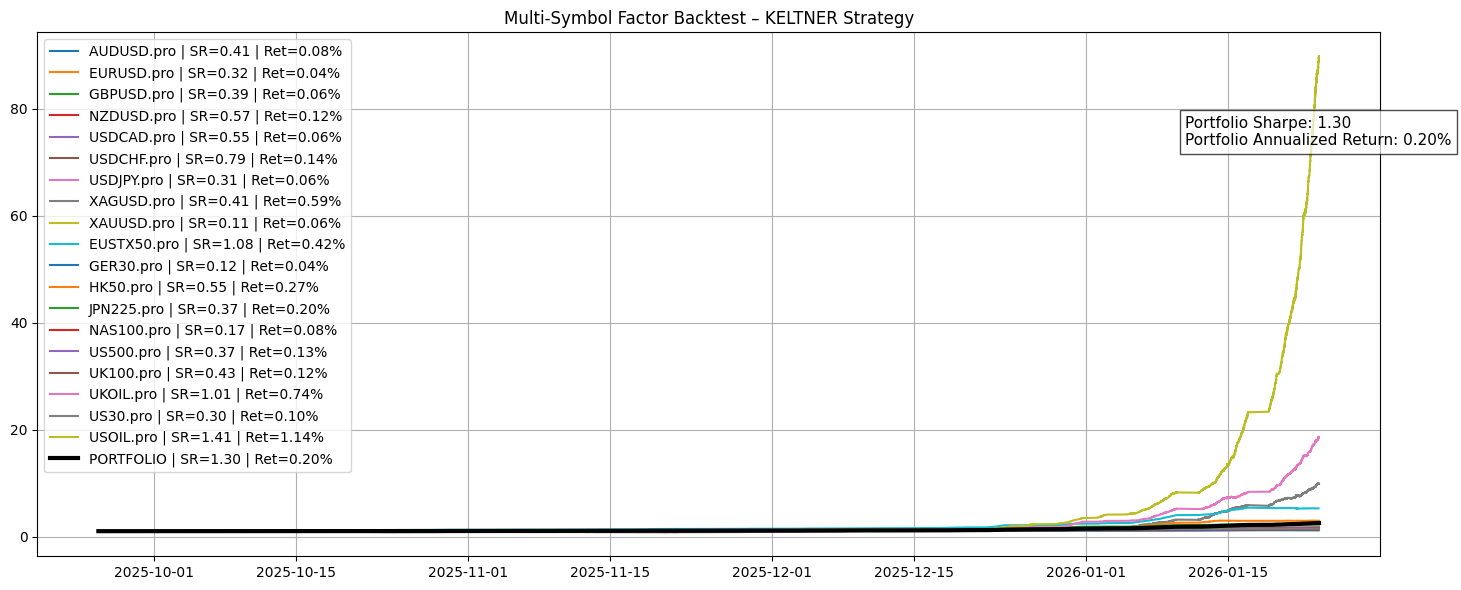

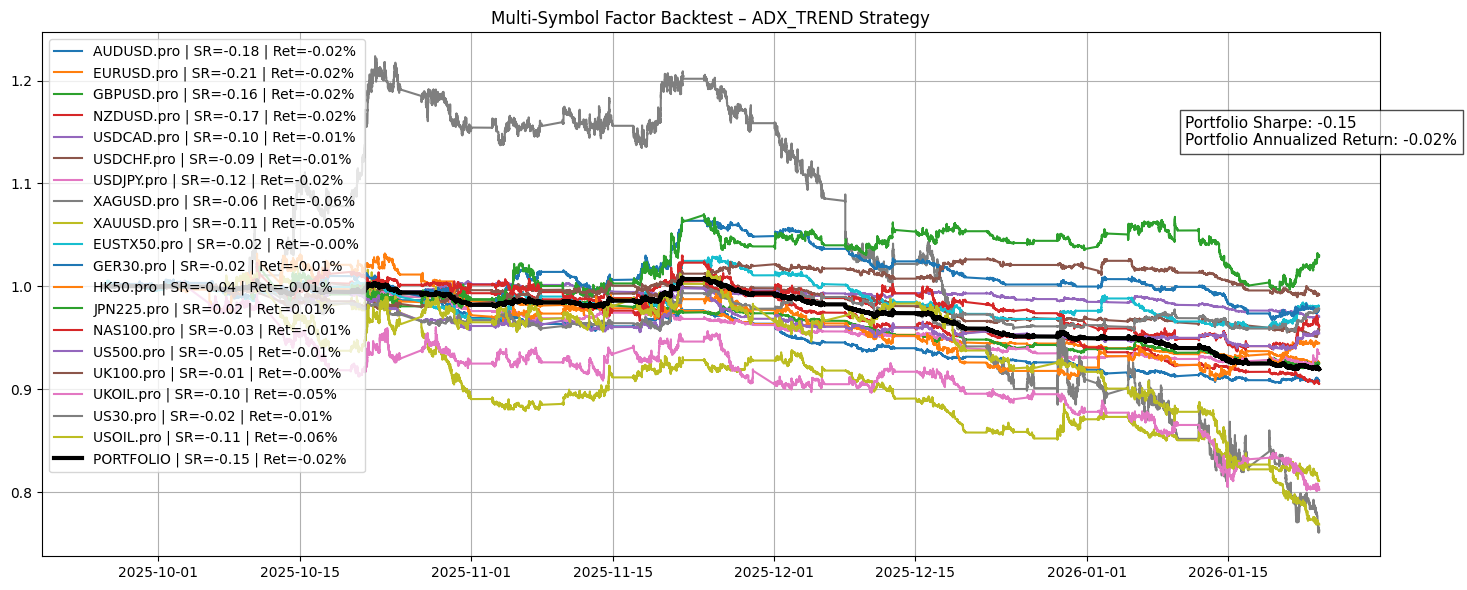

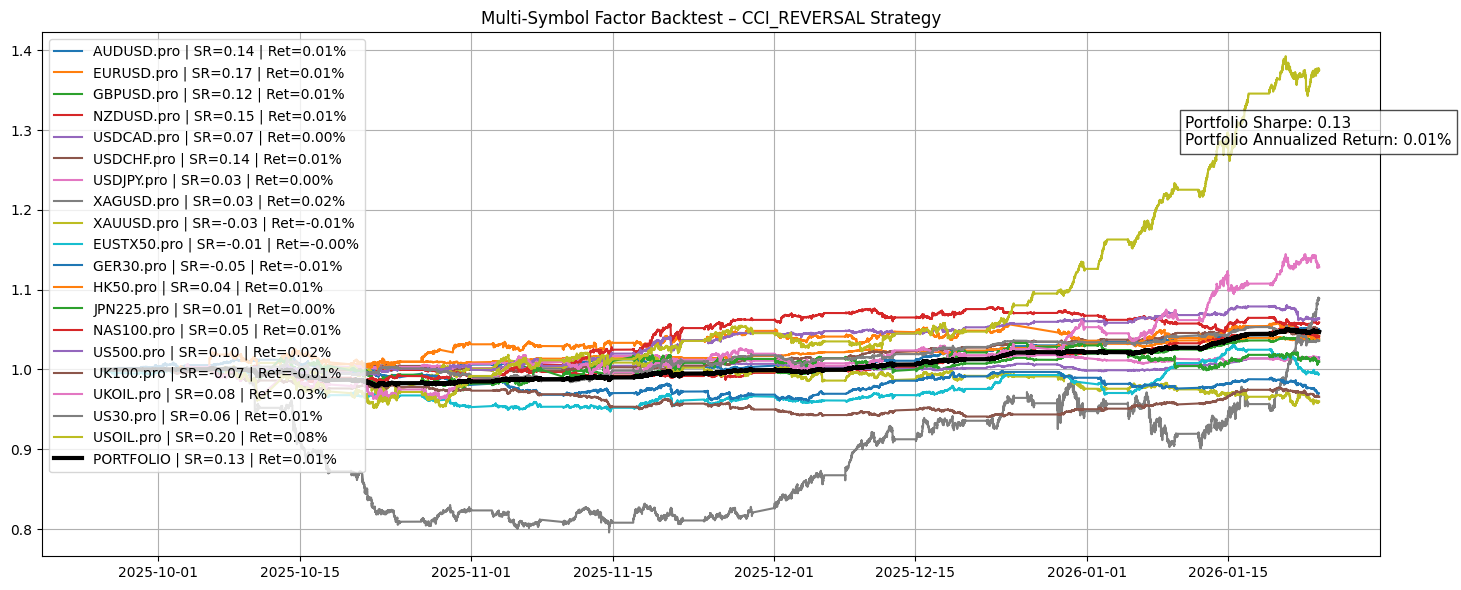

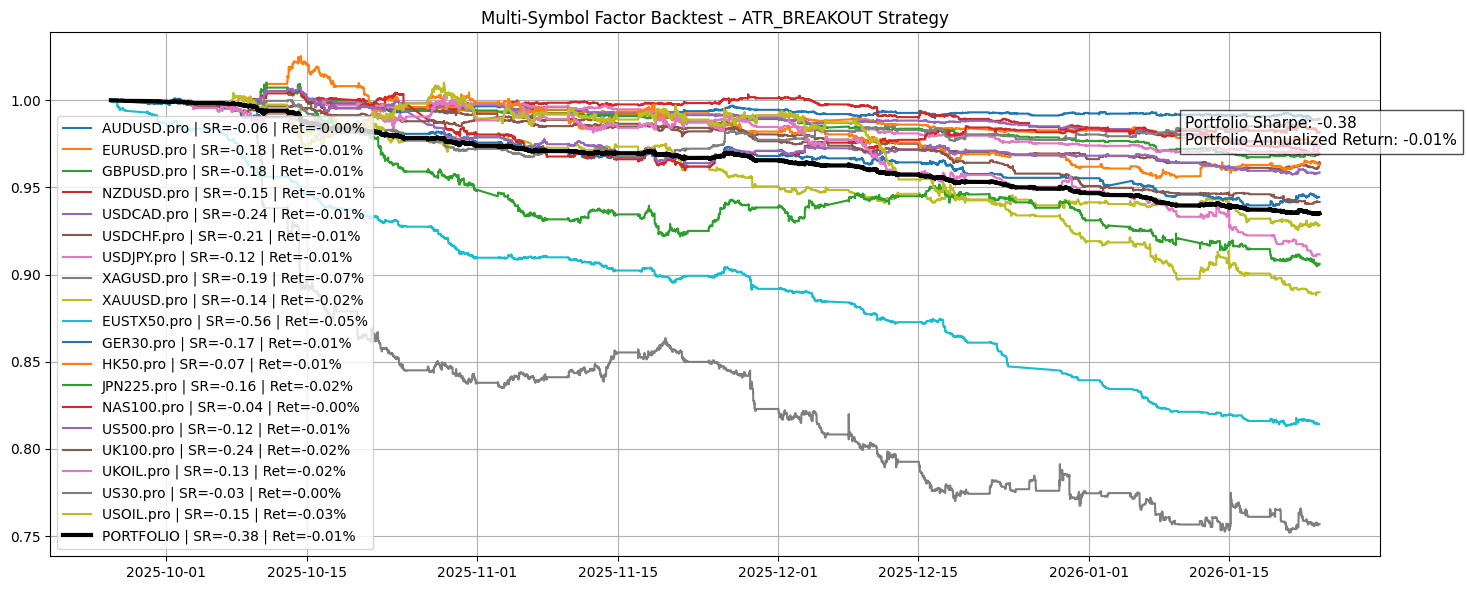

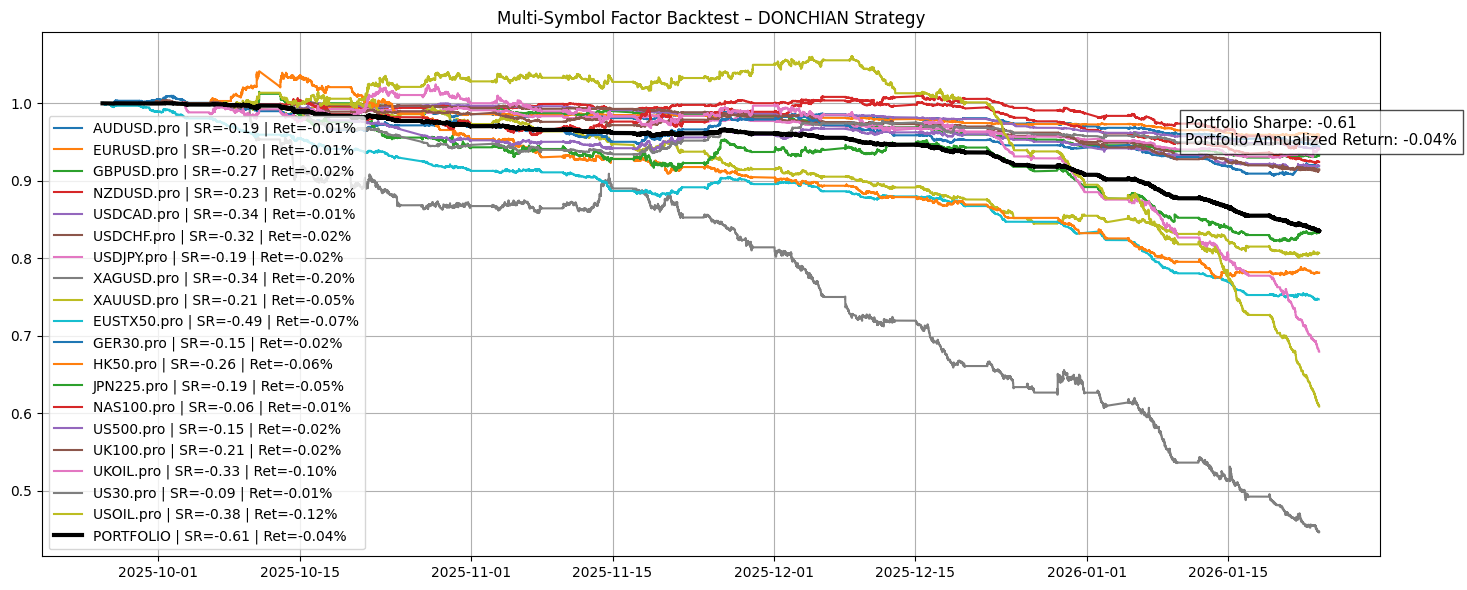

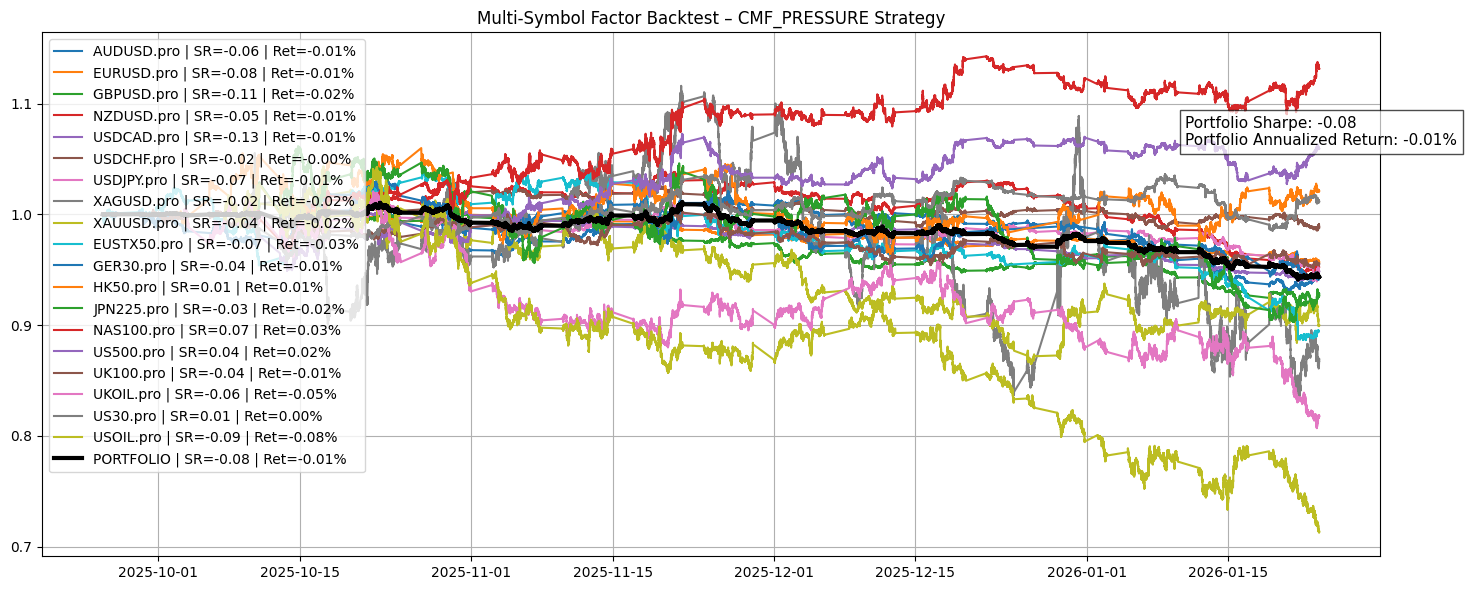

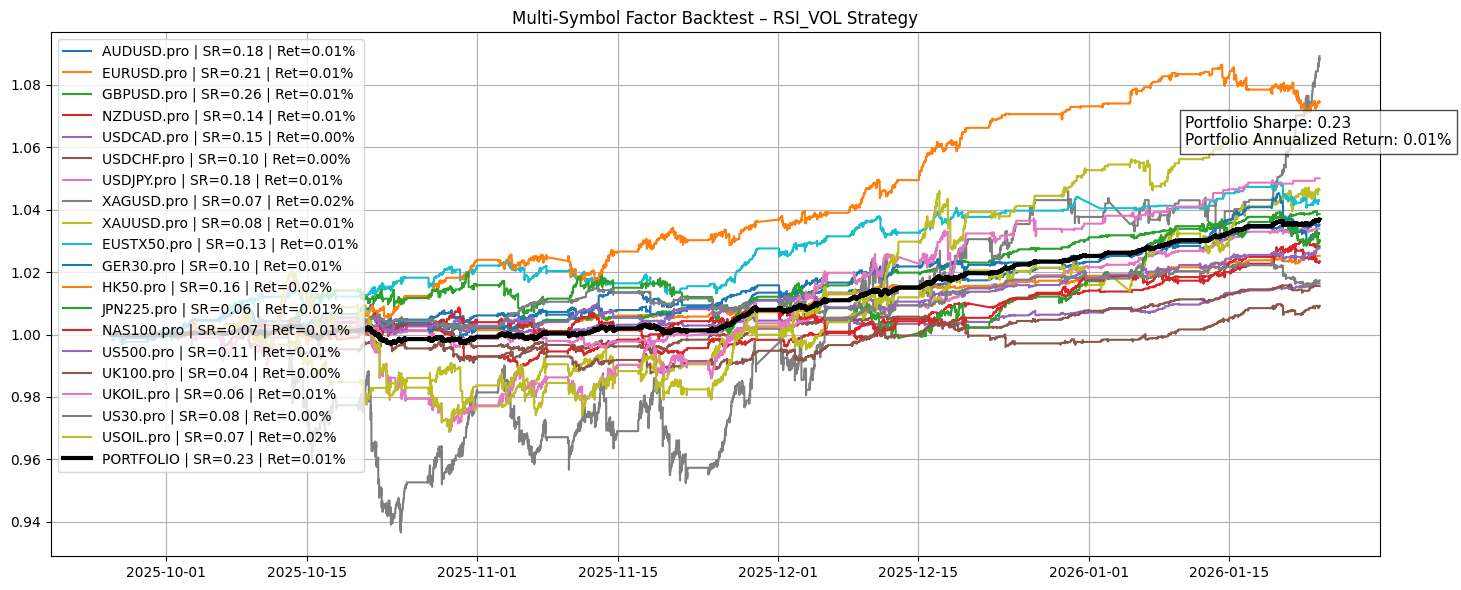

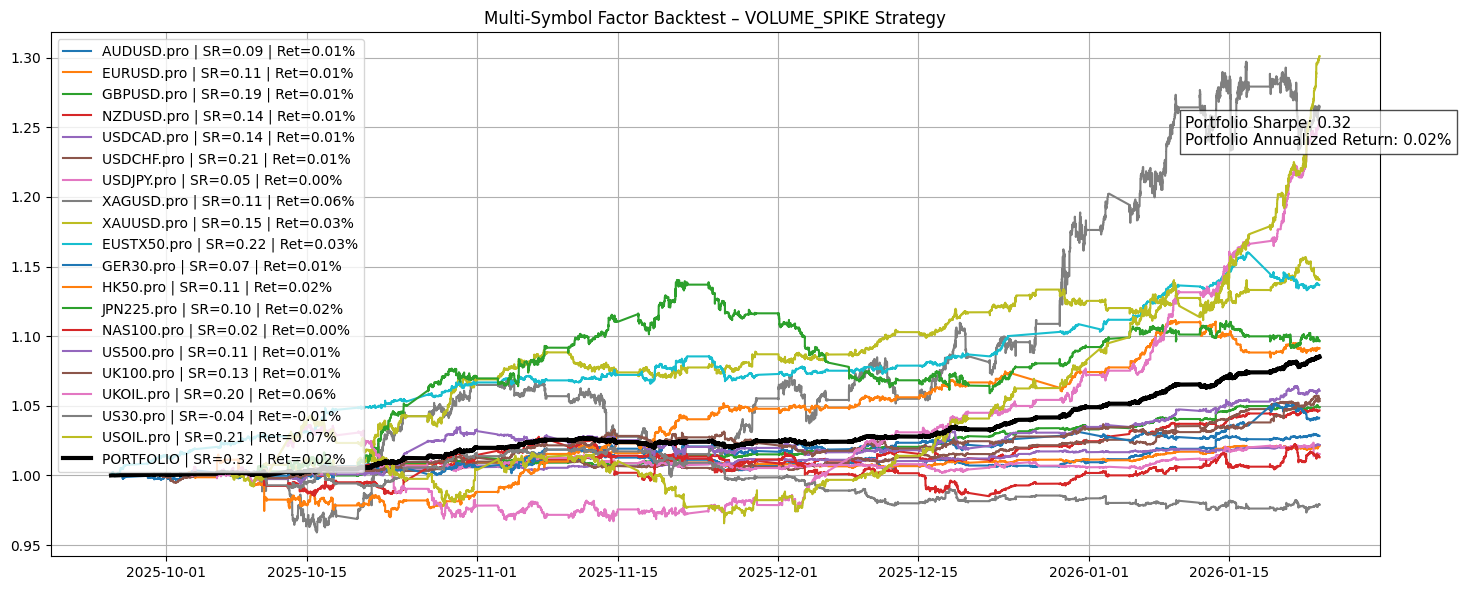

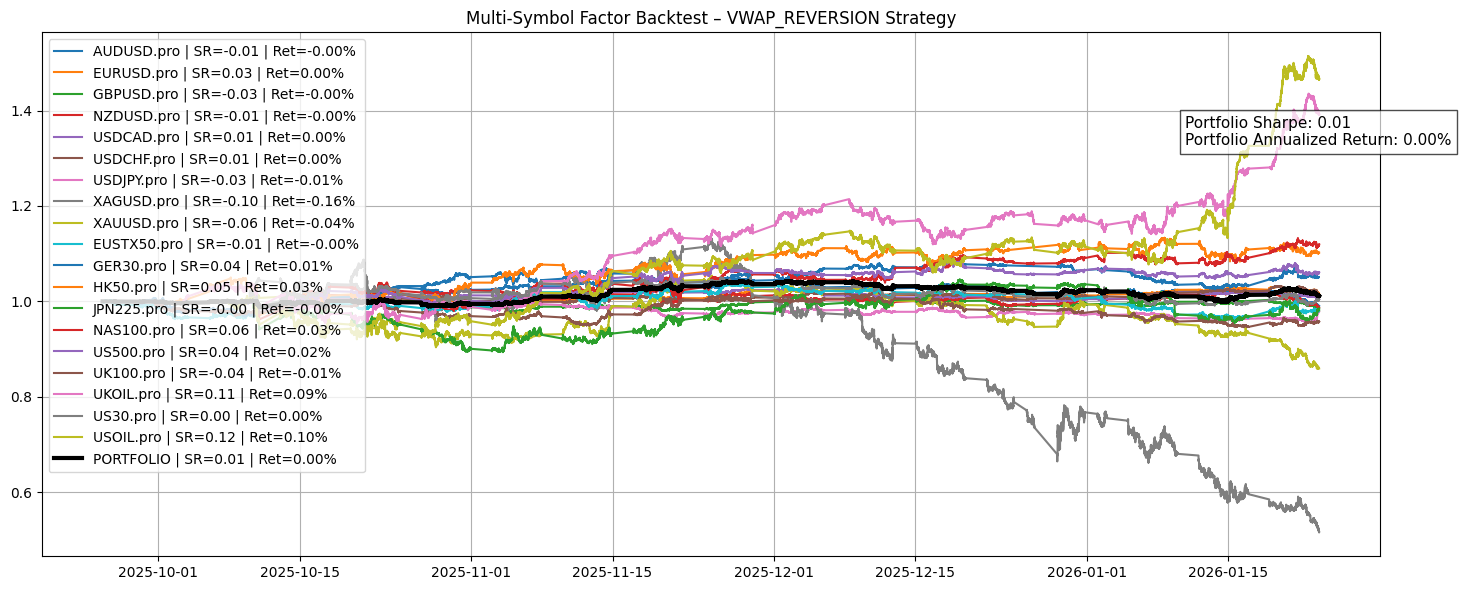

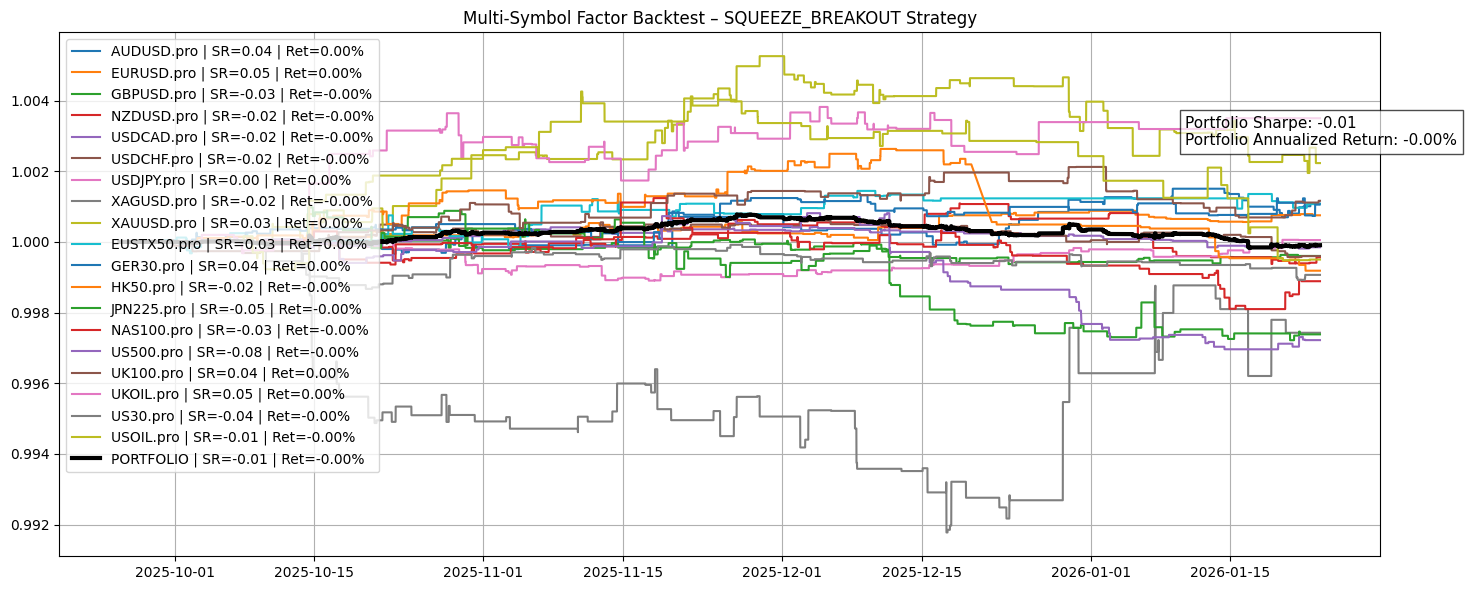

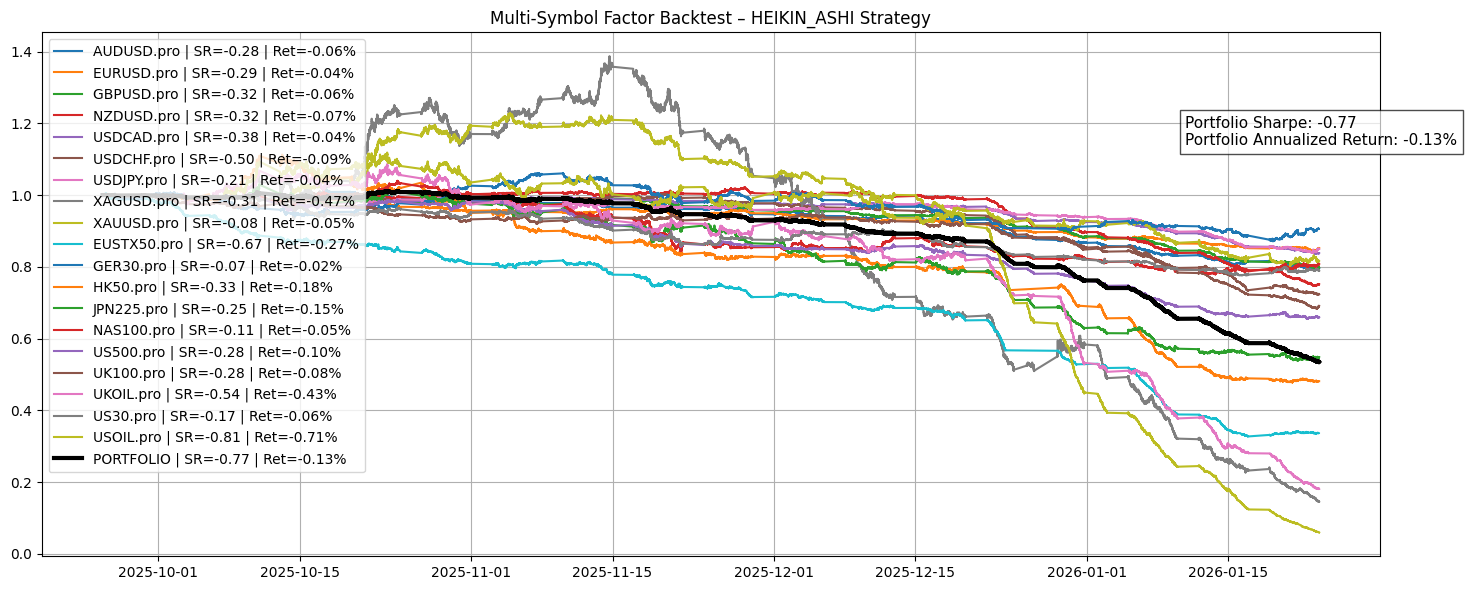

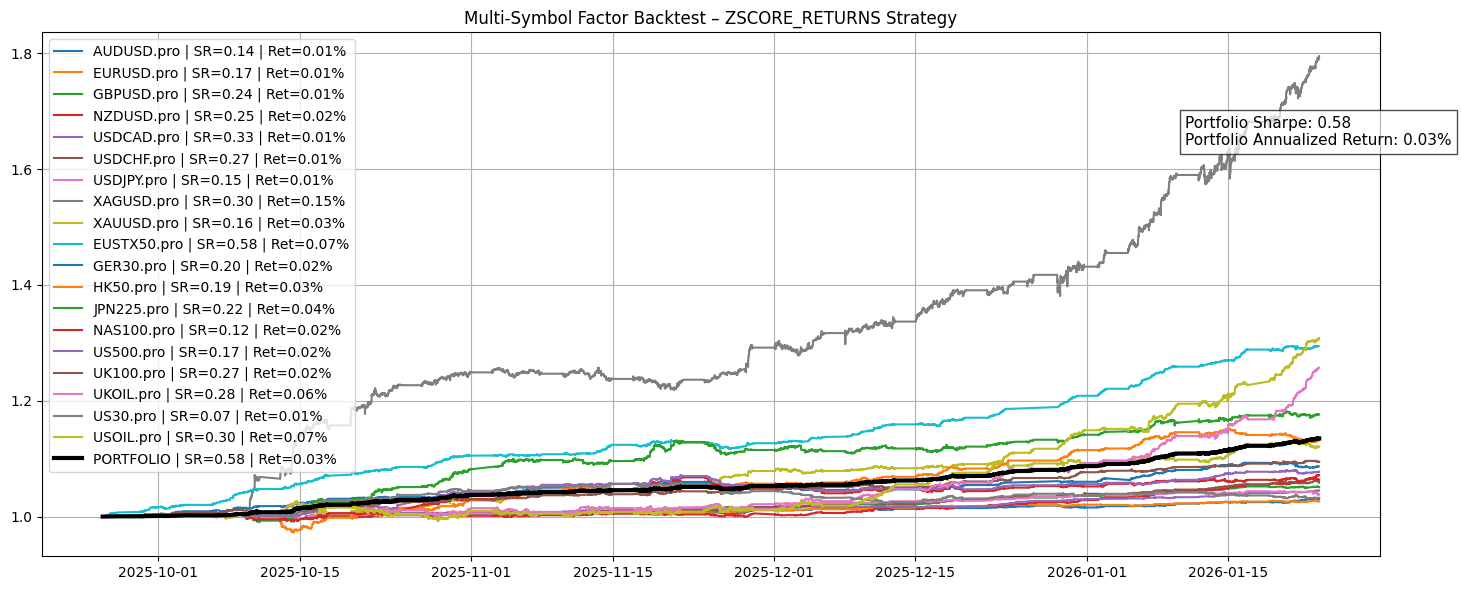

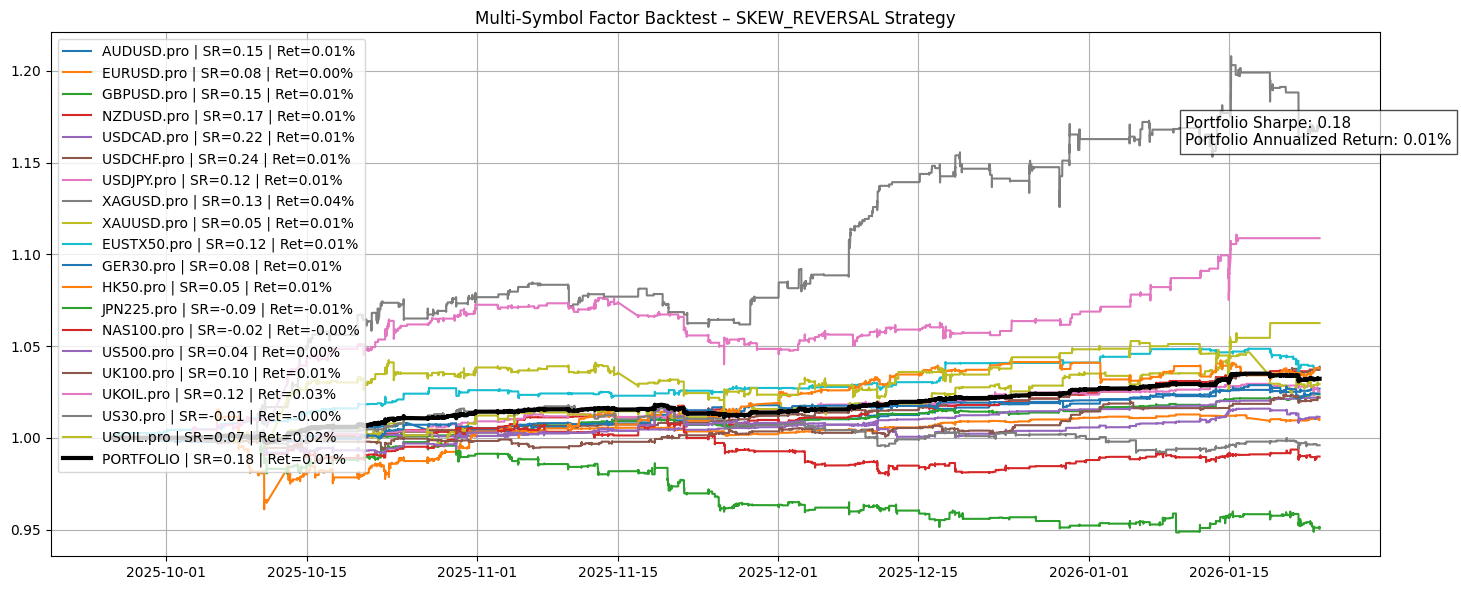

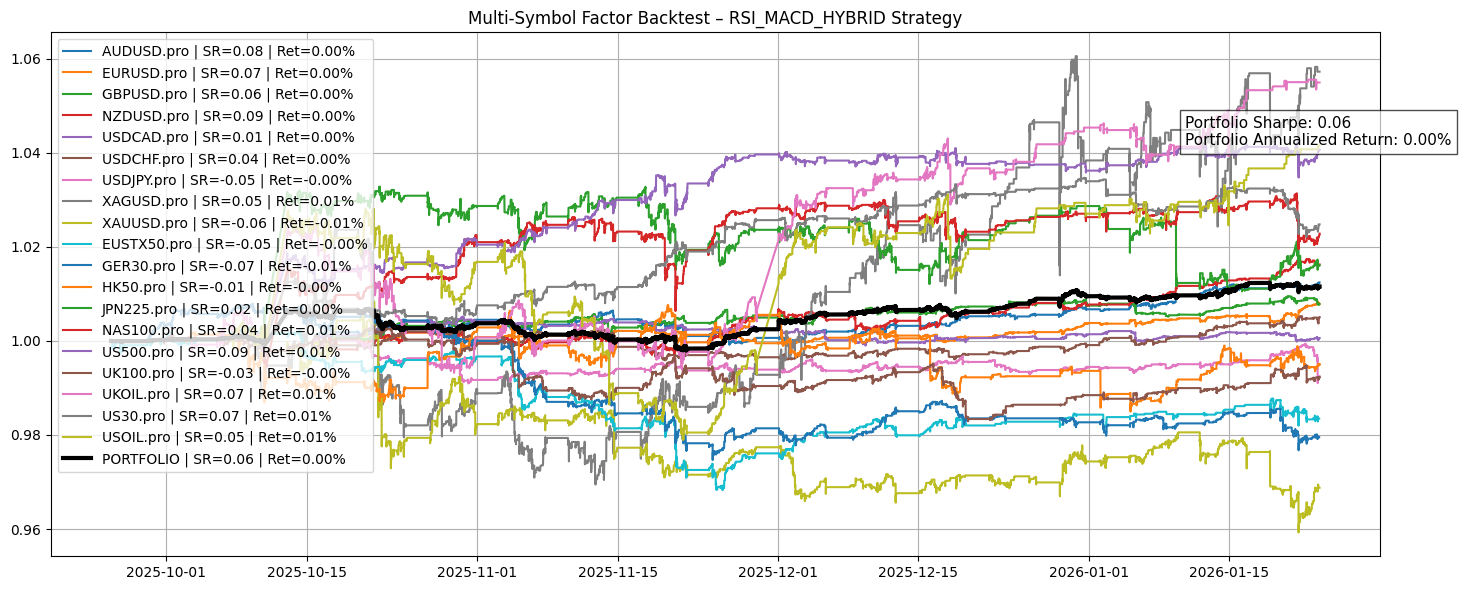

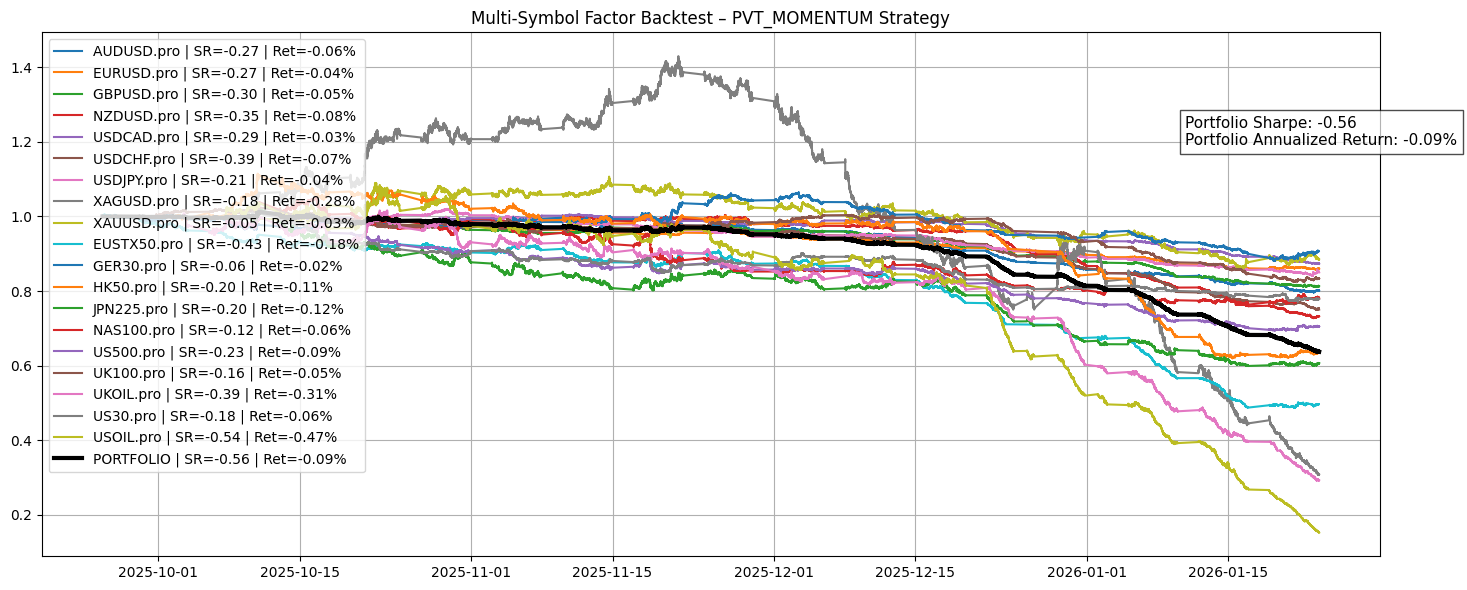

In [4]:
import MetaTrader5 as mt5
import pandas as pd
from backtest import backtest_symbols
from brokers import get_broker

broker = get_broker("acg")
broker.initialize()



factors = [
    "ma",
    "bbands",
    "macd",
    "bbands_macd",
    "pressure",
    "rsi_pressure",
    "stoch_pressure",
    "obv_pressure",
    "candle_pressure",
    "keltner",
    "adx_trend",
    "cci_reversal",
    "atr_breakout",
    "donchian",
    "cmf_pressure",
    "rsi_vol",
    "volume_spike",
    "vwap_reversion",
    "squeeze_breakout",
    "heikin_ashi",
    "zscore_returns",
    "skew_reversal",
    "rsi_macd_hybrid",
    "pvt_momentum",
]

symbols = pd.read_csv("acg_macro_signal.csv", header=None, sep="\t")[0].tolist()

all_perfs = []   # store only the performance part
timeframe = mt5.TIMEFRAME_M1
for factor in factors:
    perf, _ = backtest_symbols(
        symbols,
        factor=factor,
        timeframe=timeframe
    )
    
    perf["Factor"] = factor.upper()   # tag it
    all_perfs.append(perf)

In [5]:
import numpy as np
# 1. Combine all performance tables
combined = pd.concat(all_perfs, ignore_index=True)

# 2. Absolute Sharpe
combined["AbsSharpe"] = combined["Sharpe"].abs()

# 3. Select best strategy per symbol (keeps Returns series)
best_per_symbol = combined.loc[
    combined.groupby("Symbol")["AbsSharpe"].idxmax()
].reset_index(drop=True)

print("Best strategy per symbol:")
print(best_per_symbol[["Symbol", "Sharpe", "Factor"]])

# ---------------------------------------------------------
# Build portfolio from selected strategies
# ---------------------------------------------------------

# Extract return series
ret_dict = {
    row["Symbol"]: row["Returns"]
    for _, row in best_per_symbol.iterrows()
}

# Combine into DataFrame
portfolio_df = pd.DataFrame(ret_dict).fillna(0)

# Equal-weight portfolio return
portfolio_ret = portfolio_df.mean(axis=1)

# Portfolio Sharpe
portfolio_sharpe = (
    portfolio_ret.mean() / portfolio_ret.std()
) * np.sqrt(252)

print(f"\nPortfolio Sharpe (best-strategy filter): {portfolio_sharpe:.3f}")

Best strategy per symbol:
         Symbol    Sharpe           Factor
0    AUDUSD.pro  0.417335  CANDLE_PRESSURE
1    EURUSD.pro  0.397555         PRESSURE
2   EUSTX50.pro  1.437557  CANDLE_PRESSURE
3    GBPUSD.pro  0.508004  CANDLE_PRESSURE
4     GER30.pro  0.312800  CANDLE_PRESSURE
5      HK50.pro  0.599133  CANDLE_PRESSURE
6    JPN225.pro  0.543058  CANDLE_PRESSURE
7    NAS100.pro  0.174129          KELTNER
8    NZDUSD.pro  0.641706  CANDLE_PRESSURE
9     UK100.pro  0.546889  CANDLE_PRESSURE
10    UKOIL.pro  1.014406  CANDLE_PRESSURE
11     US30.pro  0.301730          KELTNER
12    US500.pro  0.445501      BBANDS_MACD
13   USDCAD.pro  0.629287  CANDLE_PRESSURE
14   USDCHF.pro  0.785251          KELTNER
15   USDJPY.pro  0.422914  CANDLE_PRESSURE
16    USOIL.pro  1.408562          KELTNER
17   XAGUSD.pro  0.665042  CANDLE_PRESSURE
18   XAUUSD.pro  0.360356  CANDLE_PRESSURE

Portfolio Sharpe (best-strategy filter): 1.747


In [6]:
portfolio_df

AUDUSD.pro  EURUSD.pro  EUSTX50.pro  GBPUSD.pro  \
time                                                                   
2025-09-25 11:28:00         0.0         0.0     0.000000         0.0   
2025-09-25 11:29:00         0.0         0.0    -0.000308         0.0   
2025-09-25 11:30:00         0.0         0.0     0.000253         0.0   
2025-09-25 11:31:00         0.0         0.0    -0.000000         0.0   
2025-09-25 11:32:00         0.0         0.0    -0.000141         0.0   
...                         ...         ...          ...         ...   
2026-01-23 23:55:00         0.0         0.0     0.000000         0.0   
2026-01-23 23:56:00         0.0         0.0     0.000000         0.0   
2026-01-23 23:57:00         0.0         0.0     0.000000         0.0   
2026-01-23 23:58:00         0.0         0.0     0.000000         0.0   
2026-01-23 23:59:00         0.0         0.0     0.000000         0.0   

                     GER30.pro  HK50.pro  JPN225.pro  NAS100.pro  NZDUSD.pro  \
time                                                                           
2025-09-25 11:28:00        0.0       0.0    0.000000    0.000000         0.0   
2025-09-25 11:29:00        0.0       0.0    0.000000    0.000000         0.0   
2025-09-25 11:30:00        0.0       0.0    0.000000    0.000000         0.0   
2025-09-25 11:31:00        0.0       0.0    0.000000    0.000000         0.0   
2025-09-25 11:32:00        0.0       0.0    0.000000    0.000000         0.0   
...                        ...       ...         ...         ...         ...   
2026-01-23 23:55:00        0.0       0.0   -0.000368   -0.000016         0.0   
2026-01-23 23:56:00        0.0       0.0   -0.000091   -0.000068         0.0   
2026-01-23 23:57:00        0.0       0.0   -0.000204   -0.000038         0.0   
2026-01-23 23:58:00        0.0       0.0   -0.000175   -0.000148         0.0   
2026-01-23 23:59:00        0.0       0.0   -0.000035    0.000003         0.0   

                     UK100.pro  UKOIL.pro  US30.pro  US500.pro  USDCAD.pro  \
time                                                                         
2025-09-25 11:28:00   0.000000   0.000000  0.000000   0.000000         0.0   
2025-09-25 11:29:00   0.000000   0.000000  0.000000   0.000000         0.0   
2025-09-25 11:30:00   0.000000   0.000000  0.000000   0.000000         0.0   
2025-09-25 11:31:00   0.000000   0.000000  0.000000   0.000000         0.0   
2025-09-25 11:32:00   0.000000   0.000000  0.000000   0.000000         0.0   
...                        ...        ...       ...        ...         ...   
2026-01-23 23:55:00   0.000000   0.000765 -0.000020   0.000000         0.0   
2026-01-23 23:56:00  -0.000000   0.000000 -0.000041  -0.000000         0.0   
2026-01-23 23:57:00   0.000049   0.000000  0.000041   0.000000         0.0   
2026-01-23 23:58:00   0.000049   0.000138  0.000039  -0.000042         0.0   
2026-01-23 23:59:00   0.000000  -0.000000  0.000097  -0.000055         0.0   

                     USDCHF.pro  USDJPY.pro  USOIL.pro  XAGUSD.pro  XAUUSD.pro  
time                                                                            
2025-09-25 11:28:00         0.0         0.0   0.000000         0.0         0.0  
2025-09-25 11:29:00         0.0         0.0   0.000000         0.0         0.0  
2025-09-25 11:30:00         0.0         0.0   0.000000         0.0         0.0  
2025-09-25 11:31:00         0.0         0.0   0.000000         0.0         0.0  
2025-09-25 11:32:00         0.0         0.0   0.000000         0.0         0.0  
...                         ...         ...        ...         ...         ...  
2026-01-23 23:55:00         0.0         0.0  -0.000213         0.0         0.0  
2026-01-23 23:56:00         0.0         0.0  -0.000196         0.0         0.0  
2026-01-23 23:57:00         0.0         0.0   0.000654         0.0         0.0  
2026-01-23 23:58:00         0.0         0.0   0.000638         0.0         0.0  
2026-01-23 23:59:00         0.0         0.0   0.000882  

In [3]:
import MetaTrader5 as mt5
import pandas as pd 
from factorsignal import generate_signal
from backtest import fetch_mt5_data


symbols = pd.read_csv("acg_macro_signal.csv", header=None, sep="\t")[0].tolist()

df = fetch_mt5_data(symbol=symbols[1], timeframe=mt5.TIMEFRAME_M1)[0]
signal = generate_signal(df, factor=factor)

sig_prev = signal.shift(1)
steps = (signal - sig_prev).abs().fillna(0).astype(int)

counts = steps.value_counts().sort_index()
print(counts)
no_transition = (steps == 0).sum()
one_step      = (steps == 1).sum()
two_steps     = (steps == 2).sum()

print("No transition:", no_transition)
print("1-step transitions:", one_step)
print("2-step transitions:", two_steps)

0    70218
1    10237
2    19544
Name: count, dtype: int64
No transition: 70218
1-step transitions: 10237
2-step transitions: 19544
